https://www.kaggle.com/c/classification-choose-tutors/

In this competition your task will be to predict the probability for a tutor to be a proper one for preparing for the math exam. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).

Ваша задача этом соревновании - предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [1]:
# You can only use these imports:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
#from imblearn import over_sampling, under_sampling
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
# For Colab
# from google.colab import drive
# # This will prompt for authorization.
# drive.mount('/content/drive')
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Choose_tutors_classification_data/train.csv')
# test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Choose_tutors_classification_data/test.csv')
# train.head()

In [2]:
train = pd.read_csv('Choose_tutors_classification_data/train.csv')
test = pd.read_csv('Choose_tutors_classification_data/test.csv')
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [6]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [4]:
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [7]:
test.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14999.50000,45.924500,1.985700,1699.910000,1.702300,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,64.149400
std,2886.89568,8.031977,1.771217,526.260094,0.789644,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,13.570096
min,10000.00000,23.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,12499.75000,41.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,14999.50000,46.000000,2.000000,1550.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,17499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,19999.00000,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000


Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [3]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(train.drop(['Id', 'choose'], axis=1),
                                                                    train['choose'], test_size=0.25)

Преобразовываем pandas dataframe в numpy arrays

In [4]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [6]:
# функция точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
# ноль циклов
# def knn(x_train, y_train, x_test, k, weights=None):
    
#     # расчет расстояний от классифицируемых объектов до
#     # объектов обучающей выборки
#     distances = np.sqrt(np.sum(np.square(x_test[:, np.newaxis] - x_train), axis=2))
                
#     answers = []    
#     for distance in distances:
#         # Записываем в список значение расстояния и ответа на объекте обучающей выборки
#         test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
#         # создаем словарь со всеми возможными классами
#         classes = {class_item: 0 for class_item in set(y_train)}
        
#         # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
#         for d in sorted(test_distances)[0:k]:
#             classes[d[1]] += 1

#         # Записываем в список ответов наиболее часто встречающийся класс
#         answers.append(sorted(classes, key=classes.get)[-1])
        
#     return answers

In [16]:
k = 10

%time y_pred_train = knn(X_train, y_train, X_train, k)
%time y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Wall time: 43.3 s
Wall time: 14.7 s
Точность алгоритма на трейне при k = 10: 0.901
Точность алгоритма на тесте при k = 10: 0.882


Выбираем k=10 и расчитываем результаты.

In [25]:
X = train.drop(['Id', 'choose'], axis=1).to_numpy()
y = train['choose'].to_numpy()
test_np = test.drop(['Id'], axis=1).to_numpy()

In [7]:
# один цикл: один цикл - 45 сек при k=10
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
            
        # расчет расстояний от классифицируемого объекта до
        # объектов обучающей выборки
        distances = np.sqrt(np.sum(np.square(x - x_train), axis=1))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # больше оптимизации
        test_distances = np.c_[distances, y_train]
        for d in sorted(test_distances, key=lambda x: x[0])[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Перебор разных k с целью нахождения оптимального для избежания переобучения

In [20]:
k_list = []
train_score = []
test_score = []

for k in tqdm(range(1, 20)):
    k_list.append(k)
    y_pred_train = knn(X_train, y_train, X_train, k)
    y_pred = knn(X_train, y_train, X_test, k)
    train_score.append(accuracy(y_pred_train, y_train))
    test_score.append(accuracy(y_pred, y_test))
    
print(f'Точность алгоритма на трейне: {train_score}')
print(f'Точность алгоритма на тесте: {test_score}')
print(f'Done for k={k}!')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [17:13<00:00, 54.39s/it]

Точность алгоритма на трейне: [0.9986666666666667, 0.9258666666666666, 0.9208, 0.9116, 0.9070666666666667, 0.9049333333333334, 0.902, 0.9018666666666667, 0.9002666666666667, 0.9008, 0.8968, 0.8966666666666666, 0.8952, 0.8950666666666667, 0.8953333333333333, 0.8946666666666667, 0.8928, 0.8930666666666667, 0.8914666666666666]
Точность алгоритма на тесте: [0.8388, 0.7976, 0.874, 0.862, 0.8864, 0.8784, 0.8872, 0.884, 0.8912, 0.888, 0.8928, 0.8924, 0.892, 0.8916, 0.8924, 0.8924, 0.892, 0.8936, 0.894]
Done for k=19!


In [22]:
def get_score_plot(k, train_score, test_score):
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.xlim(0, k)
    plt.plot(list(range(k)), train_score, label='train score')
    plt.plot(list(range(k)), test_score, label='test score')
    plt.legend(loc='upper right')
    plt.show()

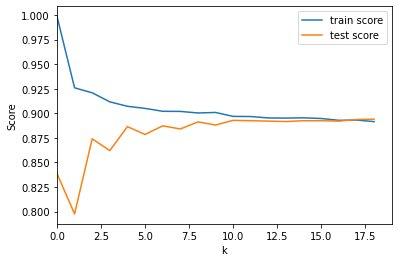

In [24]:
get_score_plot(19, train_score, test_score)

**Вывод:** лучшее k = 10, чтобы избежать переобучения системы.

In [21]:
l = []
l.append([1,2,3])
l.append([4,5,6])
l

[[1, 2, 3], [4, 5, 6]]

In [26]:
k = 10

%time y_pred_test = knn(X, y, test_np, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_test, y):.3f}')

Wall time: 1min 14s
Точность алгоритма на трейне при k = 10: 0.864


Выгрузка submissions с разным числом k

In [ ]:
for k in tqdm(range(1, 20)):
    y_pred_test = knn(X, y, test_np, k)
    print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_test, y):.3f}')
    submission = pd.DataFrame({'Id': test['Id'], 'choose': y_pred_test})
    submission.to_csv(f'Choose_tutors_classification_data/submission_k{k}.csv', index=False, encoding='utf-8')
    print(f'Done for k={k}!')

In [27]:
pd.DataFrame(y_pred_test).describe()

,0
count,10000.000000
mean,0.015400
std,0.123144
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [27]:
submission = pd.DataFrame({'Id': test['Id'], 'choose': y_pred_test})
submission.to_csv(f'Choose_tutors_classification_data/submission_k{k}.csv', index=False, encoding='utf-8')
print('Done!')

Done!


In [25]:
# submit predictions
kaggle competitions submit -c classification-choose-tutors -f submission -m "Message"

SyntaxError: invalid syntax (<ipython-input-25-5da3c1c8659e>, line 1)

In [ ]:
# retrieve your scores
!kaggle competitions submissions -c classification-choose-tutors -q

2 0.78031
3 0.71999
4 0.8062   !!
5 0.75304
6 0.84546  !!!
7 0.71409
8 0.76134
9 0.68761
k10 0.74594
k11 0.70215
k12 0.74784
k13 0.67965
k14 0.71634
k15 0.65230
k16 0.68865
k17 0.64347
k18 0.66061
k19 0.62478
k20 0.64745